n	Num of Nodes	err_n

32	11		0.17311946902654862

128	27		0.12334070796460173

512	55		0.06747787610619471

2048	113		0.033738938053097356

8192	239		0.0165929203539823



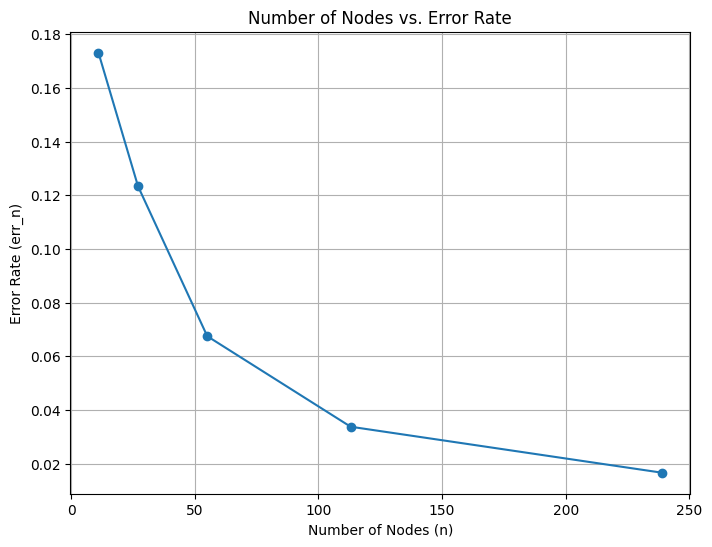

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
import random
with open('Dbig.txt', 'r') as file:
    data = file.readlines()
random.seed(490)
perm = random.sample(range(len(data)), len(data))
x = [data[i] for i in perm[:8192]]
y = [data[i] for i in perm[8192:]]
train_sizes = [32, 128, 512, 2048, 8192]
nested_training_sets = {}

for i in train_sizes:
    nested_training_sets[f'D{i}'] = [x[j] for j in range(i)]

n_values = []
err_values = []
train_sizes = [32, 128, 512, 2048, 8192]
for size in train_sizes:
    x_train = []
    y_train = []
    for line in nested_training_sets[f'D{size}']:
        values = line.strip().split()
        x_train.append([float(values[0]), float(values[1])])
        y_train.append(int(values[2]))

    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)

    n_nodes = clf.tree_.node_count

    x_test = []
    y_test = []
    for line in y:
        values = line.strip().split()
        x_test.append([float(values[0]), float(values[1])])
        y_test.append(int(values[2]))

    y_pred = clf.predict(x_test)
    err_n = zero_one_loss(y_test, y_pred)

    n_values.append(n_nodes)
    err_values.append(err_n)
print("n\tNum of Nodes\terr_n\n")
for n, num_nodes, test_error in zip(train_sizes, n_values, err_values):
    print(f"{n}\t{num_nodes}\t\t{test_error}\n")

plt.figure(figsize=(8, 6))
plt.plot(n_values, err_values, marker='o', linestyle='-')
plt.title('Number of Nodes vs. Error Rate')
plt.xlabel('Number of Nodes (n)')
plt.ylabel('Error Rate (err_n)')
plt.grid(True)
plt.show()
